In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas_datareader.data import DataReader
from datetime import datetime
plt.style.use('ggplot')

# Data cleaning

## 1. Tổng hợp dữ liệu

Đọc danh sách mã chứng khoán từ file symbol.csv

In [37]:
symbolData = pd.read_csv('data/symbol.csv')
symbolData

,Symbol,CompanyName
0,AAPL,Apple Inc
1,MSFT,Microsoft Corp.
2,GOOG,Alphabet Inc (Google) Class C
3,AMZN,"Amazon.com, Inc."
4,BRK.A,Berkshire Hathaway Inc.
...,...,...
95,VRTX,Vertex Pharmaceuticals Incorporated
96,EOG,"EOG Resources, Inc."
97,BKNG,Booking Holdings Inc. Common Stock
98,PGR,Progressive Corporation (The)


Đọc các thông tin của các mã chứng khoán từ file market.csv

In [38]:
marketData = pd.read_csv('data/market.csv')
marketData

,Ticker,Market cap,Price,Chg % 1D,Chg 1D,Technical Rating 1D,Vol 1D,Volume * Price 1D,P/E(TTM),EPS(TTM),Employees,Sector
0,AAPLApple Inc,2.351TUSD,147.81USD,−0.34%,−0.50USD,Neutral,65.446M,9.674B,24.30,6.14USD,164K,Electronic Technology
1,MSFTMicrosoft Corp.,1.901TUSD,255.02USD,0.13%,0.33USD,Buy,21.528M,5.49B,27.45,9.33USD,221K,Technology Services
2,GOOGAlphabet Inc (Google) Class C,1.303TUSD,100.83USD,−0.44%,−0.45USD,Buy,18.821M,1.898B,20.38,5.09USD,156.5K,Technology Services
3,"AMZNAmazon.com, Inc.",960.282BUSD,94.13USD,−1.43%,−1.37USD,Sell,72.496M,6.824B,87.70,1.11USD,1.608M,Retail Trade
4,BRK.ABerkshire Hathaway Inc.,696.418BUSD,477402.98USD,0.07%,317.98USD,Buy,2.794K,1.334B,—,−1194.00USD,372K,Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
95,VRTXVertex Pharmaceuticals Incorporated,82.493BUSD,321.37USD,0.19%,0.61USD,Buy,1.095M,351.862M,25.32,12.81USD,3.9K,Health Technology
96,"EOGEOG Resources, Inc.",81.63BUSD,138.97USD,−1.12%,−1.57USD,Neutral,3.933M,546.506M,11.04,12.82USD,2.8K,Energy Minerals
97,BKNGBooking Holdings Inc. Common Stock,80.893BUSD,2085.44USD,1.22%,25.15USD,Buy,270.497K,564.105M,33.83,61.20USD,20.3K,Consumer Services
98,PGRProgressive Corporation (The),77.528BUSD,132.51USD,0.95%,1.25USD,Strong Buy,1.253M,166.066M,92.89,1.42USD,49.077K,Finance


Xuất thông tin của marketData, các kiểu dữ liệu của các cột

In [39]:
marketData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ticker               100 non-null    object
 1   Market cap           100 non-null    object
 2   Price                100 non-null    object
 3   Chg % 1D             100 non-null    object
 4   Chg 1D               100 non-null    object
 5   Technical Rating 1D  100 non-null    object
 6   Vol 1D               100 non-null    object
 7   Volume * Price 1D    100 non-null    object
 8   P/E(TTM)             100 non-null    object
 9   EPS(TTM)             100 non-null    object
 10  Employees            100 non-null    object
 11  Sector               100 non-null    object
dtypes: object(12)
memory usage: 9.5+ KB


Chúng ta có thể thấy các dữ liệu vẫn còn đều ở dạng `object`, chúng ta cần chuyển chúng về kiểu dữ liệu cho phù hợp từng cột

Các kiểu dữ liệu của các cột trong symbolData

In [40]:
symbolData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Symbol       100 non-null    object
 1   CompanyName  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


Bỏ đi các cột không xét đến

In [41]:
marketData = marketData.drop(['P/E(TTM)', 'EPS(TTM)', 'Technical Rating 1D', 'Ticker'], axis=1)
marketData

,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
0,2.351TUSD,147.81USD,−0.34%,−0.50USD,65.446M,9.674B,164K,Electronic Technology
1,1.901TUSD,255.02USD,0.13%,0.33USD,21.528M,5.49B,221K,Technology Services
2,1.303TUSD,100.83USD,−0.44%,−0.45USD,18.821M,1.898B,156.5K,Technology Services
3,960.282BUSD,94.13USD,−1.43%,−1.37USD,72.496M,6.824B,1.608M,Retail Trade
4,696.418BUSD,477402.98USD,0.07%,317.98USD,2.794K,1.334B,372K,Finance
...,...,...,...,...,...,...,...,...
95,82.493BUSD,321.37USD,0.19%,0.61USD,1.095M,351.862M,3.9K,Health Technology
96,81.63BUSD,138.97USD,−1.12%,−1.57USD,3.933M,546.506M,2.8K,Energy Minerals
97,80.893BUSD,2085.44USD,1.22%,25.15USD,270.497K,564.105M,20.3K,Consumer Services
98,77.528BUSD,132.51USD,0.95%,1.25USD,1.253M,166.066M,49.077K,Finance


- Do dữ liệu chúng ta thu thập có một số thông số không sử dụng đến, nên ta sẽ bỏ đi những cột đó và thay thế cột `Ticker` chúng ta thu thập được bằng dữ liệu file `symbol.csv`, để từ đó có đươc một data hoàn chỉnh. 

In [42]:
marketData.insert(0, "Symbol", symbolData["Symbol"].to_list())
marketData.insert(1, "Company Name", symbolData["CompanyName"].to_list())

DataFrame của dữ liệu

In [43]:
data = marketData
data

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
0,AAPL,Apple Inc,2.351TUSD,147.81USD,−0.34%,−0.50USD,65.446M,9.674B,164K,Electronic Technology
1,MSFT,Microsoft Corp.,1.901TUSD,255.02USD,0.13%,0.33USD,21.528M,5.49B,221K,Technology Services
2,GOOG,Alphabet Inc (Google) Class C,1.303TUSD,100.83USD,−0.44%,−0.45USD,18.821M,1.898B,156.5K,Technology Services
3,AMZN,"Amazon.com, Inc.",960.282BUSD,94.13USD,−1.43%,−1.37USD,72.496M,6.824B,1.608M,Retail Trade
4,BRK.A,Berkshire Hathaway Inc.,696.418BUSD,477402.98USD,0.07%,317.98USD,2.794K,1.334B,372K,Finance
...,...,...,...,...,...,...,...,...,...,...
95,VRTX,Vertex Pharmaceuticals Incorporated,82.493BUSD,321.37USD,0.19%,0.61USD,1.095M,351.862M,3.9K,Health Technology
96,EOG,"EOG Resources, Inc.",81.63BUSD,138.97USD,−1.12%,−1.57USD,3.933M,546.506M,2.8K,Energy Minerals
97,BKNG,Booking Holdings Inc. Common Stock,80.893BUSD,2085.44USD,1.22%,25.15USD,270.497K,564.105M,20.3K,Consumer Services
98,PGR,Progressive Corporation (The),77.528BUSD,132.51USD,0.95%,1.25USD,1.253M,166.066M,49.077K,Finance


In [44]:
data.head(10)

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
0,AAPL,Apple Inc,2.351TUSD,147.81USD,−0.34%,−0.50USD,65.446M,9.674B,164K,Electronic Technology
1,MSFT,Microsoft Corp.,1.901TUSD,255.02USD,0.13%,0.33USD,21.528M,5.49B,221K,Technology Services
2,GOOG,Alphabet Inc (Google) Class C,1.303TUSD,100.83USD,−0.44%,−0.45USD,18.821M,1.898B,156.5K,Technology Services
3,AMZN,"Amazon.com, Inc.",960.282BUSD,94.13USD,−1.43%,−1.37USD,72.496M,6.824B,1.608M,Retail Trade
4,BRK.A,Berkshire Hathaway Inc.,696.418BUSD,477402.98USD,0.07%,317.98USD,2.794K,1.334B,372K,Finance
5,TSLA,"Tesla, Inc.",615.32BUSD,194.86USD,0.08%,0.16USD,73.645M,14.35B,99.29K,Consumer Durables
6,UNH,UnitedHealth Group Incorporated,500.961BUSD,536.16USD,−0.14%,−0.75USD,2.346M,1.258B,350K,Health Services
7,JNJ,Johnson & Johnson,467.679BUSD,178.88USD,0.08%,0.14USD,5.824M,1.042B,141.7K,Health Technology
8,XOM,Exxon Mobil Corporation,452.436BUSD,109.86USD,−0.85%,−0.94USD,15.248M,1.675B,63K,Energy Minerals
9,V,Visa Inc.,448.747BUSD,217.66USD,0.30%,0.66USD,5.133M,1.117B,26.5K,Commercial Services


Chúng ta cần chuyển các cột biểu diễn số về với dạng số, để có thể xử lý, tính toán cho các bước sau. Dưới đây là hàm giúp chúng ta chuyển đổi các ô số lớn về dạng làm tròn của chúng.

In [45]:
m = {'K': 3, 'M': 6, 'B': 9, 'T': 12}
def convertBigNumber(data, base):
    if data == '-':
        return data
    elif (data[-1].isalpha()):
        factor = m[data[-1]]
        return float(float(data[:-1]) * (10**(factor-base)))

Chuyển đổi các cột có thể về dạng số, xoá đi các dòng chứa NaN

In [46]:
data['Market cap'] = data['Market cap'].str.replace('USD', '')
data['Price'] = data['Price'].str.replace('USD', '')

data['Chg 1D'] = data['Chg 1D'].str.replace('USD', '')
data['Chg % 1D'] = data['Chg % 1D'].str.replace('%', '')

# Sửa lại kí hiệu do khác biệt về cách thức mã hóa
data['Chg 1D'] = data['Chg 1D'].str.replace('−', '-')
data['Chg % 1D'] = data['Chg % 1D'].str.replace('−', '-')

for i in range(len(data)):
    # Convert to numeric data
    data['Market cap'][i] = convertBigNumber(data['Market cap'][i], 6) # milion USD
    data['Vol 1D'][i] = convertBigNumber(data['Vol 1D'][i], 6) # milion USD
    data['Volume * Price 1D'][i] = convertBigNumber(data['Volume * Price 1D'][i], 6) # milion USD
    data['Employees'][i] = convertBigNumber(data['Employees'][i], 0) # person


# Xóa các dòng chứa các dữ liệu Nan
data = data.replace('—', np.nan)
data = data.dropna(axis='index')
data.to_csv('clean_data.csv')

Chuyển đổi kiểu dữ liệu của data và xem mô tả dữ liệu

In [47]:
convert_types = {
    'Market cap': float,
    'Price': float,
    'Vol 1D': float,
    'Volume * Price 1D': float,
    'Employees': int,
    'Chg 1D': float,
    'Chg % 1D': float
}

data = data.astype(convert_types)
data.describe(include='all')

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
count,98,98,9.800000e+01,98.000000,98.000000,98.000000,98.000000,98.000000,9.800000e+01,98
unique,98,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
top,AAPL,Apple Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Health Technology
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
mean,NaN,NaN,2.494530e+05,5094.341633,-0.043673,3.407347,10.043966,1258.734265,1.564428e+05,NaN
std,NaN,NaN,3.293596e+05,48202.858112,1.317085,32.399345,15.247433,2005.462353,2.948573e+05,NaN
min,NaN,NaN,7.663700e+04,19.020000,-4.930000,-12.730000,0.002794,166.066000,2.800000e+03,NaN
25%,NaN,NaN,1.096565e+05,95.455000,-0.815000,-0.922500,1.950500,478.662000,3.015375e+04,NaN
50%,NaN,NaN,1.531365e+05,160.205000,-0.050000,-0.075000,4.322500,670.129000,7.700000e+04,NaN
75%,NaN,NaN,2.482005e+05,282.690000,0.767500,0.910000,10.156000,1055.500000,1.670000e+05,NaN


In [48]:
data

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
0,AAPL,Apple Inc,2351000.0,147.81,-0.34,-0.50,65.446000,9674.000,164000,Electronic Technology
1,MSFT,Microsoft Corp.,1901000.0,255.02,0.13,0.33,21.528000,5490.000,221000,Technology Services
2,GOOG,Alphabet Inc (Google) Class C,1303000.0,100.83,-0.44,-0.45,18.821000,1898.000,156500,Technology Services
3,AMZN,"Amazon.com, Inc.",960282.0,94.13,-1.43,-1.37,72.496000,6824.000,1608000,Retail Trade
4,BRK.A,Berkshire Hathaway Inc.,696418.0,477402.98,0.07,317.98,0.002794,1334.000,372000,Finance
...,...,...,...,...,...,...,...,...,...,...
95,VRTX,Vertex Pharmaceuticals Incorporated,82493.0,321.37,0.19,0.61,1.095000,351.862,3900,Health Technology
96,EOG,"EOG Resources, Inc.",81630.0,138.97,-1.12,-1.57,3.933000,546.506,2800,Energy Minerals
97,BKNG,Booking Holdings Inc. Common Stock,80893.0,2085.44,1.22,25.15,0.270497,564.105,20300,Consumer Services
98,PGR,Progressive Corporation (The),77528.0,132.51,0.95,1.25,1.253000,166.066,49077,Finance


# Data exploratory and analysis

## 1. Dữ liệu tổng quát về thị trường

+ `Symbol`: Mã chứng khoán của công ty trên sàn
+ `Company` Name: Tên của công ty chủ quản
+ `Price`: Giá đóng cửa có điều chỉnh của công ty trên sàn
+ `Chg % 1D`: Tỉ lệ thay đổi trên giá trong ngày gần nhất
+ `Chg 1D`: Giá thay đổi trên giá trong ngày gần nhất
+ `Vol 1D`: Lượng giao dịch trên sàn trong ngày gần nhất
+ `Vol * Price 1D`: Giá trị giao dịch trên sàn trong ngày gần nhất
+ `Employees`: Số lượng nhân viên của công ty 
+ `Sector`: Phân loại ngành của công ty

Lấy ra 10 dòng đầu trong data

In [49]:
data.head(10)

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
0,AAPL,Apple Inc,2351000.0,147.81,-0.34,-0.50,65.446000,9674.0,164000,Electronic Technology
1,MSFT,Microsoft Corp.,1901000.0,255.02,0.13,0.33,21.528000,5490.0,221000,Technology Services
2,GOOG,Alphabet Inc (Google) Class C,1303000.0,100.83,-0.44,-0.45,18.821000,1898.0,156500,Technology Services
3,AMZN,"Amazon.com, Inc.",960282.0,94.13,-1.43,-1.37,72.496000,6824.0,1608000,Retail Trade
4,BRK.A,Berkshire Hathaway Inc.,696418.0,477402.98,0.07,317.98,0.002794,1334.0,372000,Finance
5,TSLA,"Tesla, Inc.",615320.0,194.86,0.08,0.16,73.645000,14350.0,99290,Consumer Durables
6,UNH,UnitedHealth Group Incorporated,500961.0,536.16,-0.14,-0.75,2.346000,1258.0,350000,Health Services
7,JNJ,Johnson & Johnson,467679.0,178.88,0.08,0.14,5.824000,1042.0,141700,Health Technology
8,XOM,Exxon Mobil Corporation,452436.0,109.86,-0.85,-0.94,15.248000,1675.0,63000,Energy Minerals
9,V,Visa Inc.,448747.0,217.66,0.30,0.66,5.133000,1117.0,26500,Commercial Services


### 1.1 Số lượng công ty trên từng ngành được phân bố ra sao?

Lấy ra danh sách của các sector có trong 100 mã chứng khoán này.

In [50]:
sectors = data['Sector'].unique()
sectors

array(['Electronic Technology', 'Technology Services', 'Retail Trade',
       'Finance', 'Consumer Durables', 'Health Services',
       'Health Technology', 'Energy Minerals', 'Commercial Services',
       'Consumer Non-Durables', 'Consumer Services', 'Communications',
       'Utilities', 'Process Industries', 'Transportation',
       'Producer Manufacturing'], dtype=object)

Thống kê số lượng công ty thuộc mỗi sector

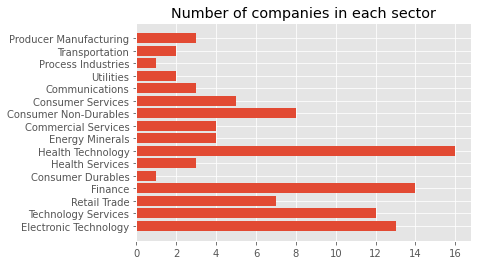

In [51]:
numberOfCompaniesInSector = []
for sector in sectors:
    numberOfCompaniesInSector.append(len(data.loc[data['Sector'] == sector]))

plt.barh(sectors, numberOfCompaniesInSector)
plt.title('Number of companies in each sector')
plt.show()

Từ biểu đồ, ta thấy được có bao nhiêu công ty trên từng sector. Health Technology (Công nghệ y học) đang chiếm một lượng nhiều công ty nhất trong danh sách này, cùng với đó là một số ngành như Finance (Tài chính), Technology Services (Dịch vụ công nghệ), Electronic Technology (Điện tử) cũng chiếm một phần lớn. Trái ngược với đó, ngành Consumer Durables (Hàng hoá lâu bền) và Process Industries (Công nghiệp chế biến) chỉ có duy nhất 1 công ty trong danh sách này.

In [52]:
data.loc[data['Sector'] == 'Consumer Durables']

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
5,TSLA,"Tesla, Inc.",615320.0,194.86,0.08,0.16,73.645,14350.0,99290,Consumer Durables


Công ty duy nhất thuộc ngành Consumer Durables là Tesla.Inc, đứng thứ 5 trên bảng xếp hạng. Tesla là một công ty của Mỹ chuyên thiết kế, sản xuất và phân phối sản phẩm ô tô điện và linh kiện cho các phương tiện chạy điện, đi đầu trong việc chuyển mình từ xe sử dụng nhiên liệu xăng sang nhiên liệu điện.

In [53]:
data.loc[data['Sector'] == 'Process Industries']

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
40,LIN,Linde plc,166779.0,337.35,0.03,0.09,1.201,405.074,72327,Process Industries


Linde plc là một công ty hóa chất đa quốc gia toàn cầu được thành lập tại Đức, tới năm 2018,công ty đã đặt trụ sở tại Ireland và có trụ sở chính tại Vương quốc Anh. Linde là công ty khí công nghiệp lớn nhất thế giới tính theo thị phần và doanh thu.

### 1.2 Cấu trúc thị trường dựa trên Market cap (Vốn hoá) như thế nào?

Vẽ biểu đồ tròn để thể hiện cấu trúc thị trường

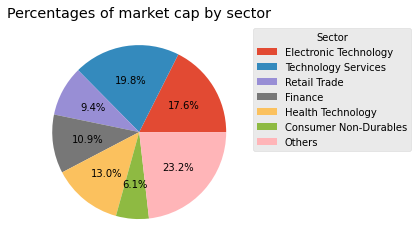

In [54]:
sumMarketCapBySector = []
for sector in sectors:
    sumMarketCapBySector.append(data.loc[data['Sector'] == sector, 'Market cap'].sum())

percentages = np.array(sumMarketCapBySector) / sum(sumMarketCapBySector)
d = dict(map(lambda i,j : (i,j) , sectors, percentages))
d['Others'] = 0.0
threshold = 0.05
others = []
for k in d:
    if (d[k] < threshold):
        d['Others'] += d[k]
        others.append(k)

for sector in others:
    d.pop(sector)

plt.pie(d.values(), autopct="%1.1f%%")
plt.legend(labels = d.keys(), title = "Sector", bbox_to_anchor = (1, 0, 0.5, 1))
plt.title('Percentages of market cap by sector')
plt.show()

Khi biểu diễn vốn hoá bằng biểu đồ tròn, ta thấy lượng vốn hoá chiếm nhiều nhất ở các ngành như Electronic Technology, Technology Services, Health Technology hay Finance. Đây đồng thời cũng là 4 ngành có số lượng nhiều nhất trong danh sách này. Tuy số lượng công ty trong ngành Finance lớn hơn 3 ngành còn lại, nhưng lượng vốn hoá của các công ty Electronic Technology hay Technology Services tỏ ra vượt trội (gần như gấp đôi).

### 1.3 Cấu trúc giá trị giao dịch trong ngày gần nhất ra sao?

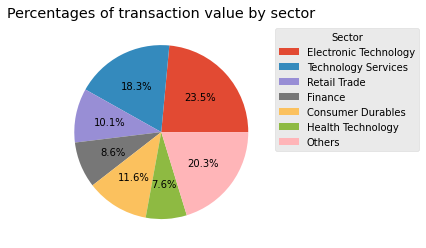

In [55]:
totalVolume1DBySector = []
for sector in sectors:
    totalVolume1DBySector.append(data.loc[data['Sector'] == sector, 'Volume * Price 1D'].sum())

percentages = np.array(totalVolume1DBySector) / sum(totalVolume1DBySector)
d = dict(map(lambda i,j : (i,j) , sectors, percentages))
d['Others'] = 0.0
threshold = 0.05
others = []
for k in d:
    if (d[k] < threshold):
        d['Others'] += d[k]
        others.append(k)

for sector in others:
    d.pop(sector)

plt.pie(d.values(), autopct="%1.1f%%")
plt.legend(labels = d.keys(), title = "Sector", bbox_to_anchor = (1, 0, 0.5, 1))
plt.title('Percentages of transaction value by sector')
plt.show()

Có thể thấy, thể hiện của giá trị lượng giao dịch gần đây của các ngành cũng khá tương ứng với cấu trúc vốn hoá, ngoại trừ 2 ngành Consumer Durables và Health Technology đổi chỗ cho nhau. 

### 1.4 Thay đổi về giá của các mã chứng khoán trên từng ngành của thị trường gần đây như thế nào?

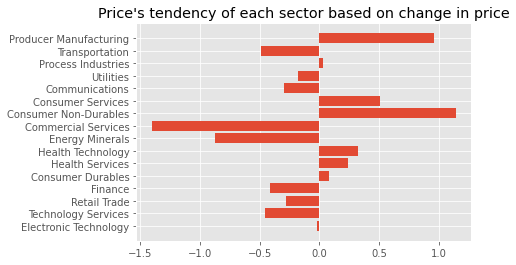

In [56]:
# Visualize the relationship between price and volume
priceTendencyBySector = []
for sector in sectors:
    priceTendencyBySector.append(data.loc[data['Sector'] == sector, 'Chg % 1D'].sum() 
        / len(data.loc[data['Sector'] == sector]))

plt.barh(sectors, priceTendencyBySector)
plt.title("Price's tendency of each sector based on change in price")
plt.show()


In [57]:
data.loc[data['Sector'] == 'Commercial Services']

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
9,V,Visa Inc.,448747.0,217.66,0.30,0.66,5.133,1117.000,26500,Commercial Services
16,MA,Mastercard Incorporated,346183.0,360.06,-0.21,-0.74,2.016,725.732,24000,Commercial Services
69,SPGI,S&P Global Inc.,117223.0,359.80,-0.77,-2.78,2.026,729.114,22850,Commercial Services
91,PYPL,"PayPal Holdings, Inc.",85114.0,74.66,-4.93,-3.87,24.238,1810.000,30900,Commercial Services


In [58]:
data.loc[data['Sector'] == 'Consumer Non-Durables']

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
13,PG,Procter & Gamble Company (The),356900.0,150.61,0.91,1.36,4.938,743.754,106000,Consumer Non-Durables
23,KO,Coca-Cola Company (The),278282.0,64.35,0.88,0.56,13.643,877.924,79000,Consumer Non-Durables
24,PEP,"PepsiCo, Inc.",255827.0,185.69,-0.11,-0.21,3.548,658.783,309000,Consumer Non-Durables
36,NKE,"Nike, Inc.",175558.0,112.20,0.98,1.09,5.892,661.079,79100,Consumer Non-Durables
42,PM,Philip Morris International Inc,161686.0,104.30,1.80,1.84,5.847,609.872,69600,Consumer Non-Durables
81,MDLZ,"Mondelez International, Inc.",93285.0,68.31,0.32,0.22,3.798,259.469,79000,Consumer Non-Durables
89,MO,"Altria Group, Inc.",85361.0,47.63,1.32,0.62,7.654,364.544,6000,Consumer Non-Durables
90,EL,"Estee Lauder Companies, Inc. (The)",85282.0,239.01,3.04,7.05,2.003,478.636,63000,Consumer Non-Durables


In [59]:
data.loc[data['Sector'] == 'Process Industries']

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
40,LIN,Linde plc,166779.0,337.35,0.03,0.09,1.201,405.074,72327,Process Industries


In [60]:
data.loc[data['Sector'] == 'Consumer Durables']

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
5,TSLA,"Tesla, Inc.",615320.0,194.86,0.08,0.16,73.645,14350.0,99290,Consumer Durables


### 1.5 Phân bố lượng lao động của các công ty như thế nào?

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa260e9900>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa260e9e40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa260e9630>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa260ea3e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa260ea6b0>],
 'means': []}

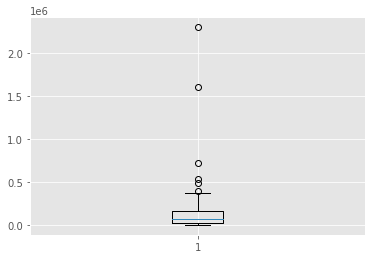

In [61]:
values = data['Employees'].values.tolist()
plt.boxplot(values)

Chúng ta có thể thấy có 6 điểm vượt ngoài biên trên của dữ liệu, chúng ta có thể bỏ 6 điểm đó để vẽ histogram

In [62]:
values.sort()
print(values)

[2800, 3795, 3900, 6000, 9793, 9900, 10368, 11300, 14400, 15000, 15500, 16881, 17300, 18400, 20000, 20300, 22473, 22850, 24000, 24200, 24450, 25988, 26500, 27605, 29905, 30900, 31000, 31000, 32200, 33400, 35000, 42595, 43900, 46000, 49077, 50000, 51000, 60000, 63000, 63000, 64000, 68000, 69600, 71970, 72327, 73541, 73700, 74814, 75000, 79000, 79000, 79000, 79100, 80000, 83000, 83300, 88000, 95000, 98200, 99000, 99290, 106000, 107700, 113000, 114000, 118400, 121100, 130000, 141700, 142000, 143000, 156500, 164000, 168000, 174000, 189000, 200000, 203000, 208000, 220000, 221000, 223400, 247848, 271025, 300000, 304000, 307600, 309000, 340000, 340000, 350000, 372000, 402000, 490600, 534000, 721000, 1608000, 2300000]


In [63]:
largeEmployeesCompany = data[data['Employees'].isin(values[-6:])]
largeEmployeesCompany

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
3,AMZN,"Amazon.com, Inc.",960282.0,94.13,-1.43,-1.37,72.496,6824.000,1608000,Retail Trade
10,WMT,Walmart Inc.,415876.0,153.22,-0.10,-0.15,6.911,1059.000,2300000,Retail Trade
17,HD,"Home Depot, Inc. (The)",334283.0,327.99,0.28,0.92,3.644,1195.000,490600,Retail Trade
32,ACN,Accenture plc,199521.0,300.13,-0.89,-2.70,1.745,523.594,721000,Technology Services
41,UPS,"United Parcel Service, Inc.",163788.0,189.39,-0.42,-0.80,3.662,693.491,534000,Transportation
68,SBUX,Starbucks Corporation,120534.0,105.05,1.63,1.68,7.917,831.668,402000,Consumer Services


Có thể thấy, các công ty có lượng nhân sự lớn hầu hết đều nằm trong Retail Trade (Bán lẻ), các công ty còn lại lần lượt nằm trong Technology Services (Dịch vụ công nghệ), Transportation (Vận chuyển), Consumer Services (Dịch vụ tiêu dùng). <br />

Đặc điểm chung của các công ty này là cần nhiều nhân sự cấp thấp như nhân viên bán hàng, nhân viên vận chuyển,... Đây cũng chính là lí do lượng nhân sự của các công ty này lớn hơn rất nhiều so với các công ty khác trong danh sách.

In [64]:
values = values[:len(values)-6]
print(values)

[2800, 3795, 3900, 6000, 9793, 9900, 10368, 11300, 14400, 15000, 15500, 16881, 17300, 18400, 20000, 20300, 22473, 22850, 24000, 24200, 24450, 25988, 26500, 27605, 29905, 30900, 31000, 31000, 32200, 33400, 35000, 42595, 43900, 46000, 49077, 50000, 51000, 60000, 63000, 63000, 64000, 68000, 69600, 71970, 72327, 73541, 73700, 74814, 75000, 79000, 79000, 79000, 79100, 80000, 83000, 83300, 88000, 95000, 98200, 99000, 99290, 106000, 107700, 113000, 114000, 118400, 121100, 130000, 141700, 142000, 143000, 156500, 164000, 168000, 174000, 189000, 200000, 203000, 208000, 220000, 221000, 223400, 247848, 271025, 300000, 304000, 307600, 309000, 340000, 340000, 350000, 372000]


(array([31., 18., 15.,  7.,  4.,  7.,  1.,  1.,  4.,  4.]),
 array([  2800.,  39720.,  76640., 113560., 150480., 187400., 224320.,
        261240., 298160., 335080., 372000.]),
 <BarContainer object of 10 artists>)

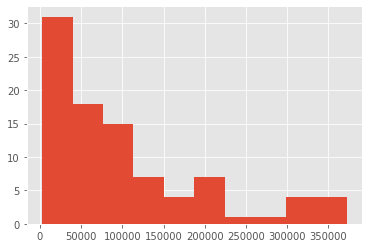

In [65]:
plt.hist(values)

Qua biểu đồ ta thấy số lượng các công ty trong danh sách có lượng nhân sự nằm trong khoảng vài nghìn cho đến 50000 chiếm nhiều nhất, vào khoảng hơn 30 công ty. Có ít các công ty có lượng nhân sự từ 100000 người trở lên.

## 2. Dữ liệu về giá của 10 mã thuộc các công ty có vốn hoá đứng đấu thị trường

In [66]:
data.head(10)

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
0,AAPL,Apple Inc,2351000.0,147.81,-0.34,-0.50,65.446000,9674.0,164000,Electronic Technology
1,MSFT,Microsoft Corp.,1901000.0,255.02,0.13,0.33,21.528000,5490.0,221000,Technology Services
2,GOOG,Alphabet Inc (Google) Class C,1303000.0,100.83,-0.44,-0.45,18.821000,1898.0,156500,Technology Services
3,AMZN,"Amazon.com, Inc.",960282.0,94.13,-1.43,-1.37,72.496000,6824.0,1608000,Retail Trade
4,BRK.A,Berkshire Hathaway Inc.,696418.0,477402.98,0.07,317.98,0.002794,1334.0,372000,Finance
5,TSLA,"Tesla, Inc.",615320.0,194.86,0.08,0.16,73.645000,14350.0,99290,Consumer Durables
6,UNH,UnitedHealth Group Incorporated,500961.0,536.16,-0.14,-0.75,2.346000,1258.0,350000,Health Services
7,JNJ,Johnson & Johnson,467679.0,178.88,0.08,0.14,5.824000,1042.0,141700,Health Technology
8,XOM,Exxon Mobil Corporation,452436.0,109.86,-0.85,-0.94,15.248000,1675.0,63000,Energy Minerals
9,V,Visa Inc.,448747.0,217.66,0.30,0.66,5.133000,1117.0,26500,Commercial Services


In [67]:
tickers = data["Symbol"].loc[:9].to_list()
for i in range(len(tickers)):
    if (tickers[i] == 'BRK.A'):
        tickers[i] = 'BRK-A'
tickers

['AAPL', 'MSFT', 'GOOG', 'AMZN', 'BRK-A', 'TSLA', 'UNH', 'JNJ', 'XOM', 'V']

In [68]:
priceData = pd.read_csv("data/price.csv", index_col='Date')
priceData

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2018-12-03,46.115002,46.235001,45.302502,46.205002,44.595947,163210000,AAPL
2018-12-04,45.237499,45.597500,44.067501,44.172501,42.634228,165377200,AAPL
2018-12-06,42.939999,43.695000,42.605000,43.680000,42.158878,172393600,AAPL
2018-12-07,43.372501,43.622501,42.075001,42.122501,40.655613,169126400,AAPL
2018-12-10,41.250000,42.522499,40.832500,42.400002,40.923454,248104000,AAPL
...,...,...,...,...,...,...,...
2022-11-28,212.259995,214.470001,210.649994,211.259995,211.259995,10229400,V
2022-11-29,209.350006,210.149994,207.350006,209.059998,209.059998,8986900,V
2022-11-30,208.220001,217.000000,208.009995,217.000000,217.000000,13918100,V


In [69]:
convert_types = {
    'Open': float,
    'High': float,
    'Low': float,
    'Close': float,
    'Adj Close': float,
    'Volume': int
}
priceData = priceData.astype(convert_types)
priceData.describe(include='all')

,Open,High,Low,Close,Adj Close,Volume,Ticker
count,10078.000000,10078.000000,10078.000000,10078.000000,10078.000000,1.007800e+04,10078
unique,NaN,NaN,NaN,NaN,NaN,NaN,10
top,NaN,NaN,NaN,NaN,NaN,NaN,AAPL
freq,NaN,NaN,NaN,NaN,NaN,NaN,1008
mean,37085.295141,37359.278765,36764.918151,37057.989667,37055.074308,4.312804e+07,NaN
std,112928.554393,113757.065416,111928.902689,112828.478290,112829.431246,5.896634e+07,NaN
min,12.073333,12.445333,11.799333,11.931333,11.931333,1.000000e+02,NaN
25%,93.465624,94.657915,92.300003,93.464876,93.206598,5.933925e+06,NaN
50%,159.102249,160.725998,157.154999,159.144997,156.299507,2.160910e+07,NaN
75%,245.997501,248.790001,242.914997,246.022499,240.218014,6.277875e+07,NaN


In [70]:
priceData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10078 entries, 2018-12-03 to 2022-12-02
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10078 non-null  float64
 1   High       10078 non-null  float64
 2   Low        10078 non-null  float64
 3   Close      10078 non-null  float64
 4   Adj Close  10078 non-null  float64
 5   Volume     10078 non-null  int32  
 6   Ticker     10078 non-null  object 
dtypes: float64(5), int32(1), object(1)
memory usage: 590.5+ KB


In [71]:
priceDataArray = []
for i in range(0, len(tickers)):
    priceDataArray.append(priceData.loc[priceData['Ticker'] == tickers[i]])

In [72]:
priceDataDict = dict(map(lambda i,j : (i,j) , tickers, priceDataArray))
priceDataDict['AAPL']

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2018-12-03,46.115002,46.235001,45.302502,46.205002,44.595947,163210000,AAPL
2018-12-04,45.237499,45.597500,44.067501,44.172501,42.634228,165377200,AAPL
2018-12-06,42.939999,43.695000,42.605000,43.680000,42.158878,172393600,AAPL
2018-12-07,43.372501,43.622501,42.075001,42.122501,40.655613,169126400,AAPL
2018-12-10,41.250000,42.522499,40.832500,42.400002,40.923454,248104000,AAPL
...,...,...,...,...,...,...,...
2022-11-28,145.139999,146.639999,143.380005,144.220001,144.220001,69246000,AAPL
2022-11-29,144.289993,144.809998,140.350006,141.169998,141.169998,83763800,AAPL
2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111380900,AAPL


## Giải thích ý nghĩa các cột

+ `Date`: Ngày giao dịch
+ `Open`: Giá bắt đầu phiên giao dịch của mã trong ngày 
+ `High`: Giá cao nhất trong phiên giao dịch
+ `Low`: Giá thấp nhất trong phiên giao dịch
+ `Close`:  Giá đóng của phiên giao dịch
+ `Adj Close`: Giá đóng có điều chỉnh của phiên giao dịch
+ `Volume`: Lượng giao dịch trong ngày
+ `Ticker`: Mã chứng khoán

### 2.1 Biểu diễn giá của các mã cổ phiếu trong 4 năm gần nhất

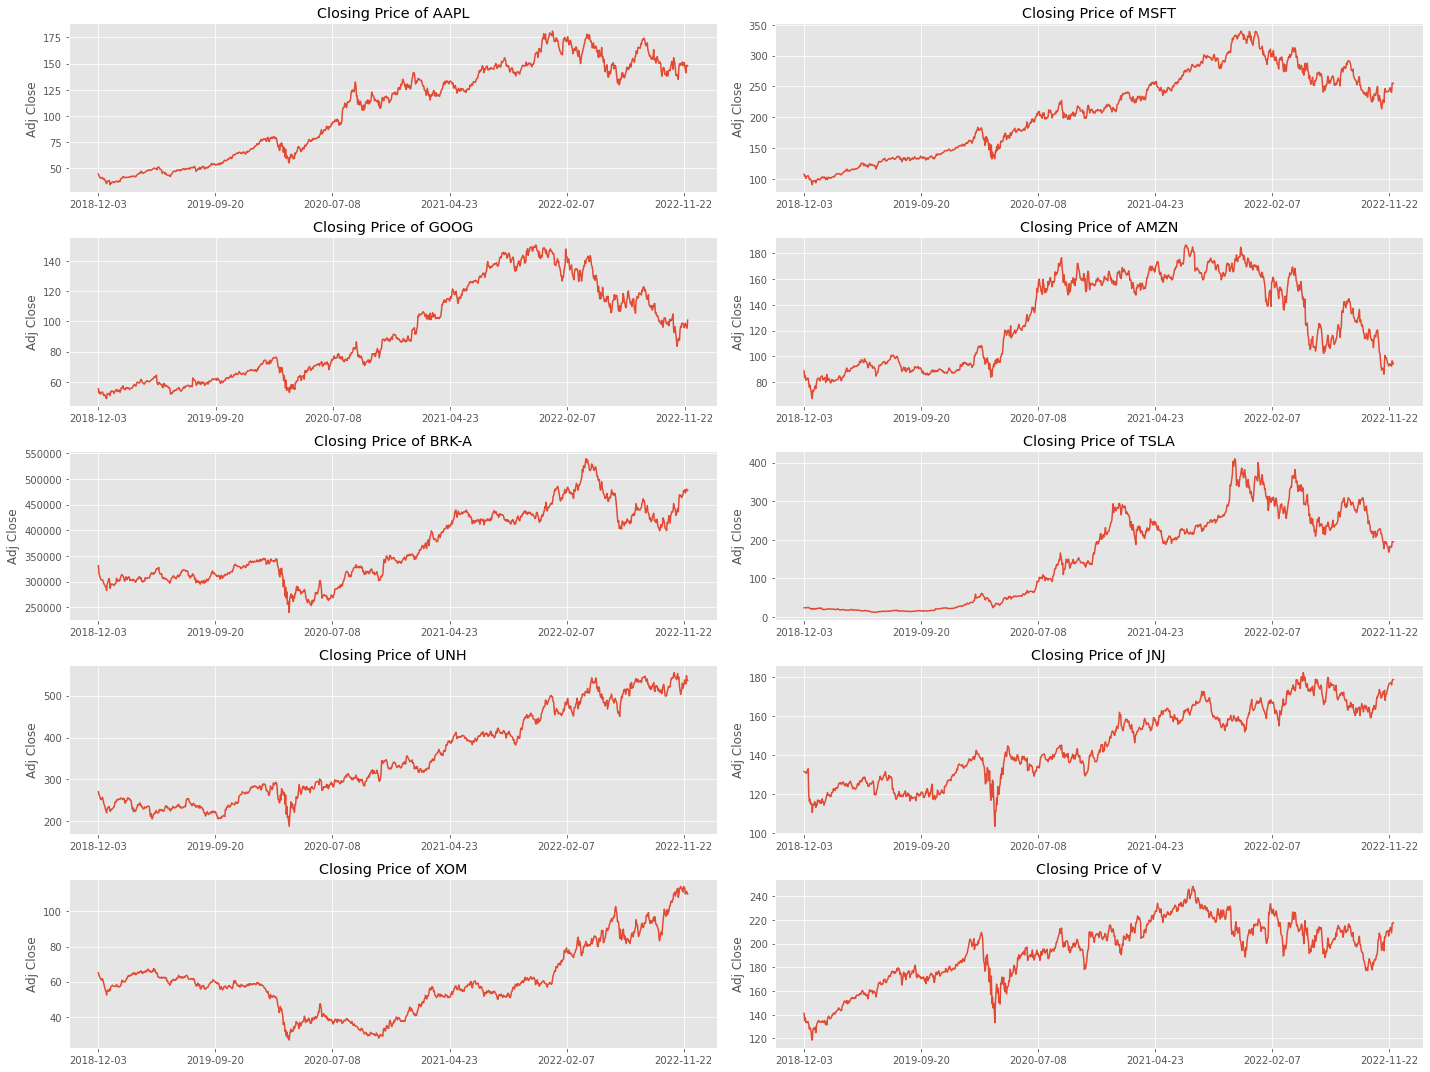

In [73]:
plt.figure(figsize=(20, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(priceDataDict.values(), 1):
    plt.subplot(5, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tickers[i - 1]}")
    
plt.tight_layout()

Nhìn chung, các mã cổ phiếu trong 4 năm qua đều có xu hướng tăng. Chúng ta cũng thấy được một số giai đoạn các mã cổ phiếu đều bị sụt giảm giá trị cổ phiếu như giai đoạn tháng 02/2020, hoặc tạo đỉnh rồi sụt giảm dần vào khoảng tháng 01/2022 ở 6 công ty đầu.

Công ty có sự phát triển đáng kể nhất trong giai đoạn này thuộc về UNH - UnitedHealth Group, một công ty quản lý dịch vụ chăm sóc sức khoẻ của Mỹ. Công ty này cung cấp các sản phẩm chăm sóc sức khoẻ và dịch vụ bảo hiểm, với giá trị cổ phiếu tăng gần như gấp đôi trong 4 năm.

Một điều đặc biệt thứ hai chúng ta có thể nhận thấy, giá của cổ phiếu BRK-A, Berkshire Hathaway Inc. có giá trị rất lớn, 1 cổ phiếu có giá tới hàng trăm nghìn $.

### 2.2 Lượng giao dịch trên dòng thời gian

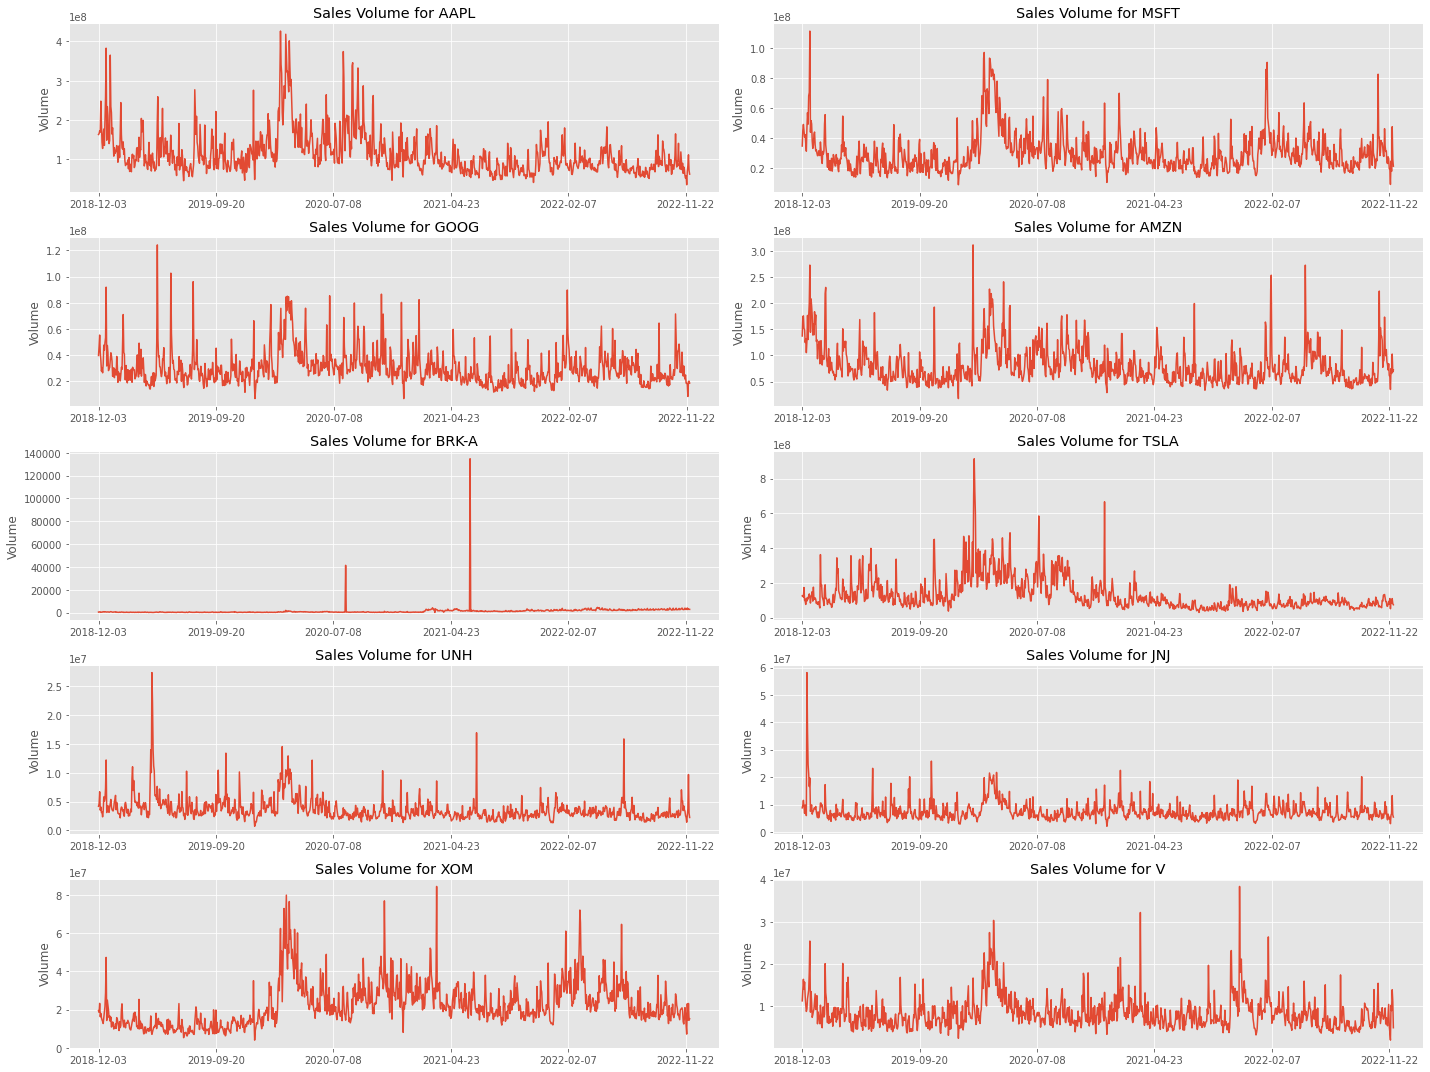

In [74]:
plt.figure(figsize=(20, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(priceDataArray, 1):
    plt.subplot(5, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    # plt.xlim(min(company['Volume']), max(company['Volume']))
    plt.title(f"Sales Volume for {tickers[i - 1]}")
    
plt.tight_layout()

Từ biểu đồ trên, ta có thể thấy lượng giao dịch giao động rất mạnh ở hầu hết các công ty này (trừ BRK-A), nhất là trong khoảng thời gian từ 09-2019 đến 07-2020. <br />
Ta có thấy 3 mã BRK-A, UNH và JNJ luôn có sự ổn định về lượng giao dịch, trái ngược với các mã cổ phiếu còn lại, luôn có lượng giao dịch lớn và khá sôi động.

## 2.3 Moving average 

In [75]:
ma_day = [30, 90, 180]

for ma in ma_day:
    for company in priceDataDict.values():
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()

priceData = priceDataDict.values()

C:\Users\X390\AppData\Local\Temp\ipykernel_8984\4115542823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['Adj Close'].rolling(ma).mean()
C:\Users\X390\AppData\Local\Temp\ipykernel_8984\4115542823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['Adj Close'].rolling(ma).mean()
C:\Users\X390\AppData\Local\Temp\ipykernel_8984\4115542823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

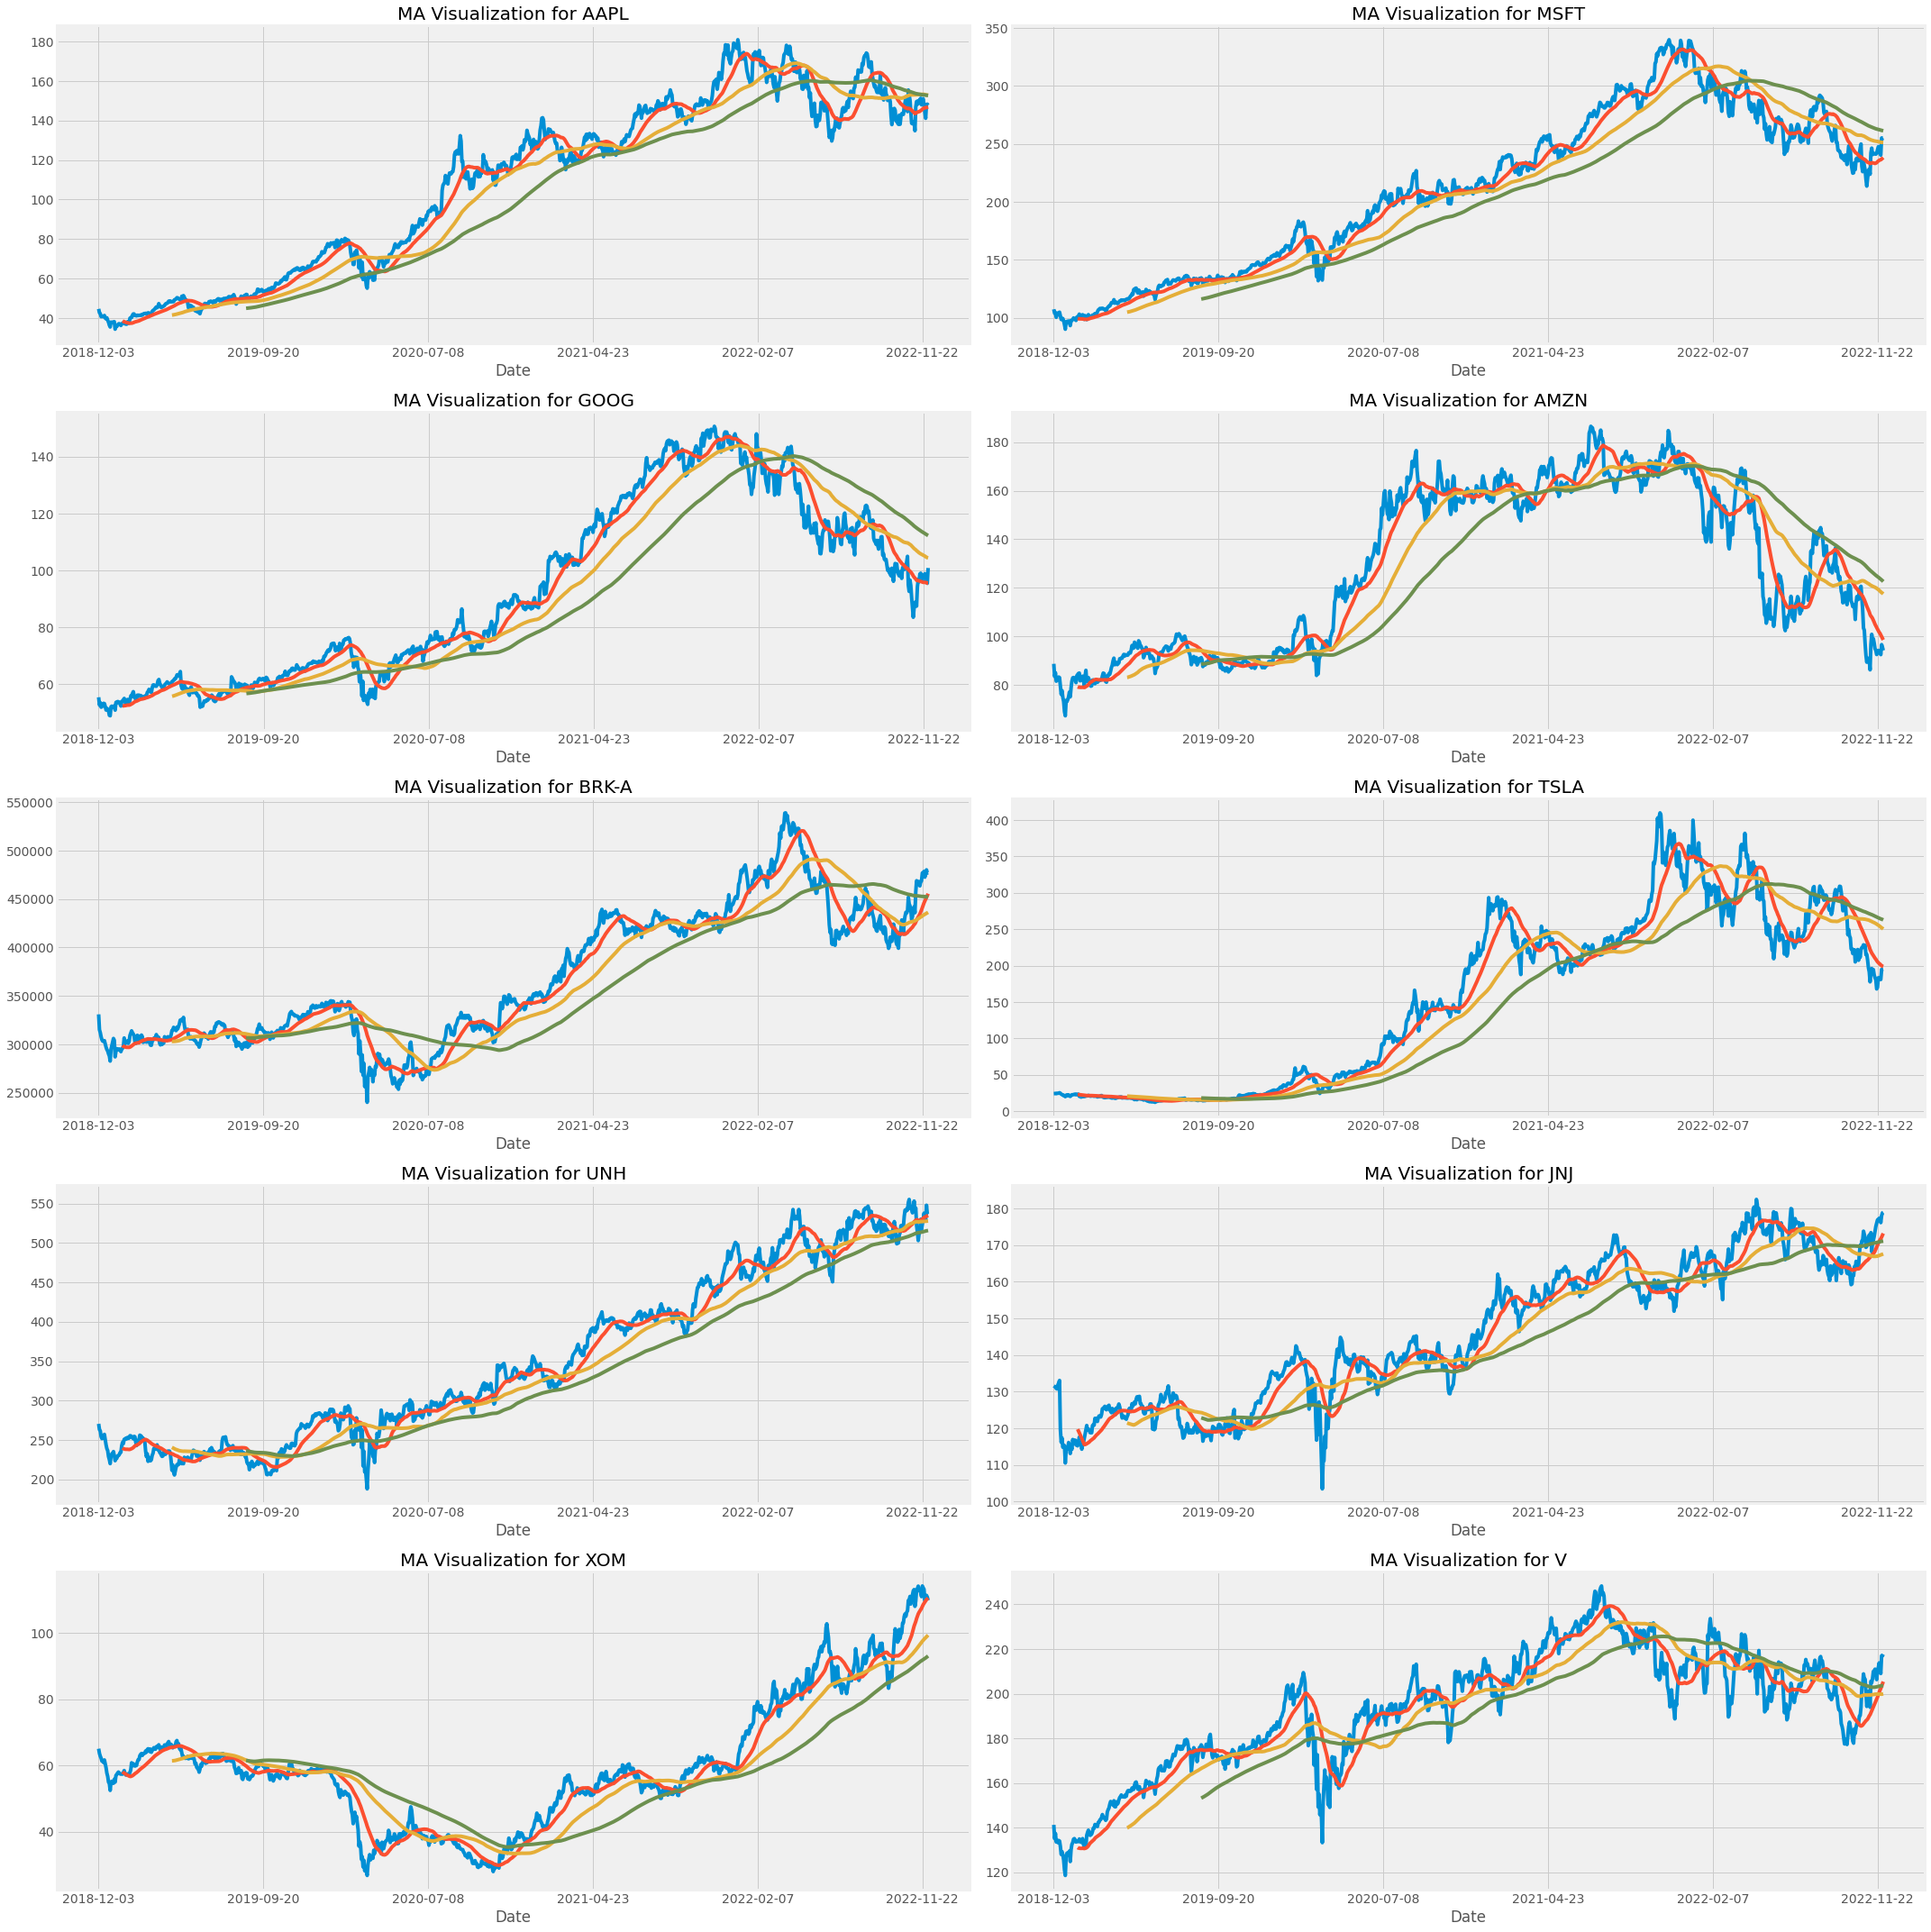

In [76]:
plt.figure(figsize=(30, 30))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.style.use('fivethirtyeight')

for i, company in enumerate(priceData, 1):
    # fig = plt.figure()
    # ax = fig.add_axes()
    plt.subplot(5, 2, i)
    ax = company['Adj Close'].plot()
    for ma in ma_day:
        ax = company[f'MA for {ma} days'].plot()
    plt.title(f"MA Visualization for {tickers[i - 1]}")

plt.tight_layout()
plt.show()


Moving average (MA) là một công cụ phân tích kỹ thuật đơn giản được sử dụng để tìm kiếm xu hướng của thị trường theo một khoảng thời gian nhất định theo sự lựa chọn của traders. Ở đây chúng ta chọn các khoảng thời gian lần lượt là 1 tháng, 3 tháng và 6 tháng để theo dõi xu hướng của thị trường. Các đường trung bình động xét trên thời gian dài hơn sẽ có độ nhiễu ít hơn. 

Nhìn vào các đường trung bình, đánh giá chung trên 4 năm qua, ta có thể thấy những mã cổ phiếu có giá trị tăng dần đều như UNH, JNJ, các mã đã đạt đỉnh và bắt đầu đi xuống như APPL, MSFT, GOOG, AMZN, TSLA, V, các mã đã chạm đáy và tăng trưởng trở lại như XOM, BRK-A.

Từ nhận xét trên, chúng ta thấy được các công ty nằm cùng lĩnh vực thường chia sẻ chung một xu hướng với nhau. Như UNH, JNJ đều là các công ty liên quan đến sản phẩm y tế, APPL, MSFT, AMZN đều là các công ty công nghệ.

### 2.4 Biểu diễn Correlation giữa các mã chứng khoán bằng Closing price và Return

Correlation (Hệ số tương quan) đánh giá 2 giá trị có mối liên hệ với nhau với không với giá trị nằm trong khoảng -1.0 đến 1.0. Tuy nhiên, nó không chỉ ra x dẫn tới y hay ngược lại, hoặc gây ra bởi một yếu tố thứ ba.

In [77]:
priceData = pd.read_csv("data/price.csv", index_col='Date').dropna()
priceData

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2018-12-03,46.115002,46.235001,45.302502,46.205002,44.595947,163210000,AAPL
2018-12-04,45.237499,45.597500,44.067501,44.172501,42.634228,165377200,AAPL
2018-12-06,42.939999,43.695000,42.605000,43.680000,42.158878,172393600,AAPL
2018-12-07,43.372501,43.622501,42.075001,42.122501,40.655613,169126400,AAPL
2018-12-10,41.250000,42.522499,40.832500,42.400002,40.923454,248104000,AAPL
...,...,...,...,...,...,...,...
2022-11-28,212.259995,214.470001,210.649994,211.259995,211.259995,10229400,V
2022-11-29,209.350006,210.149994,207.350006,209.059998,209.059998,8986900,V
2022-11-30,208.220001,217.000000,208.009995,217.000000,217.000000,13918100,V


In [78]:
tickers = data["Symbol"].loc[:9].to_list()
for i in range(len(tickers)):
    if (tickers[i] == 'BRK.A'):
        tickers[i] = 'BRK-A'
tickers

['AAPL', 'MSFT', 'GOOG', 'AMZN', 'BRK-A', 'TSLA', 'UNH', 'JNJ', 'XOM', 'V']

In [79]:
adjCloseCollection = []
for ticker in tickers:
    adjCloseCollection.append(priceData.loc[priceData["Ticker"] == ticker, "Adj Close"].tolist())

In [80]:
adjCloseCollection.pop(2)
tickers.pop(2)

'GOOG'

In [81]:
tickers

['AAPL', 'MSFT', 'AMZN', 'BRK-A', 'TSLA', 'UNH', 'JNJ', 'XOM', 'V']

In [82]:
adjCloseCollection = np.array(adjCloseCollection)
adjCloseCollection.shape
adjCloseCollection = adjCloseCollection.T

In [83]:
closingDf = pd.DataFrame(adjCloseCollection, columns=tickers, index=priceDataArray[0].index.tolist())
closingDf


,AAPL,MSFT,AMZN,BRK-A,TSLA,UNH,JNJ,XOM,V
2018-12-03,44.595947,107.384132,88.617996,330921.0,23.899332,270.545868,131.577774,65.037659,141.251389
2018-12-04,42.634228,103.964027,83.419998,315000.0,23.980000,263.194702,131.415787,63.604294,135.055817
2018-12-06,42.158878,104.605896,84.959503,312000.0,24.204000,261.588470,131.307785,62.771511,137.403503
2018-12-07,40.655613,100.419365,81.456497,307674.0,23.864668,254.341232,130.875809,62.170918,133.565369
2018-12-10,40.923454,103.073051,82.051498,304600.0,24.343332,251.837326,130.722824,61.290096,134.315475
...,...,...,...,...,...,...,...,...,...
2022-11-28,144.220001,241.759995,93.949997,472712.0,182.919998,532.270020,177.330002,109.809998,211.259995
2022-11-29,141.169998,240.330002,92.419998,475843.0,180.830002,528.000000,176.089996,110.540001,209.059998
2022-11-30,148.029999,255.139999,96.540001,480280.0,194.699997,547.760010,178.000000,111.339996,217.000000
2022-12-01,148.309998,254.690002,95.500000,477085.0,194.699997,536.909973,178.740005,110.800003,217.000000


In [84]:
closingDf.describe()

,AAPL,MSFT,AMZN,BRK-A,TSLA,UNH,JNJ,XOM,V
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,107.808849,210.841972,129.032291,369027.470238,156.964959,352.914312,146.222962,59.933659,193.473943
std,44.317757,67.616498,33.644340,69412.939660,117.761245,106.279310,19.208488,19.272651,26.630007
min,34.309582,90.178139,67.197998,240000.000000,11.931333,188.042938,103.492630,26.768915,118.582977
25%,63.653760,145.372879,93.909374,309831.500000,23.976000,254.328724,128.335667,50.043618,175.463562
50%,119.975933,212.901428,127.859001,343532.000000,182.889999,325.757462,143.897049,57.956223,198.216011
75%,146.236866,266.011093,161.189873,428641.000000,251.033329,453.329903,163.161930,65.383219,212.464485
max,180.959747,339.924835,186.570496,539180.000000,409.970001,555.150024,182.411423,114.180000,248.270004


In [85]:
tickerReturns = closingDf.pct_change()
tickerReturns.head()

,AAPL,MSFT,AMZN,BRK-A,TSLA,UNH,JNJ,XOM,V
2018-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-04,-0.043989,-0.031849,-0.058656,-0.048111,0.003375,-0.027172,-0.001231,-0.022039,-0.043862
2018-12-06,-0.011149,0.006174,0.018455,-0.009524,0.009341,-0.006103,-0.000822,-0.013093,0.017383
2018-12-07,-0.035657,-0.040022,-0.041231,-0.013865,-0.014020,-0.027705,-0.003290,-0.009568,-0.027933
2018-12-10,0.006588,0.026426,0.007305,-0.009991,0.020057,-0.009845,-0.001169,-0.014168,0.005616


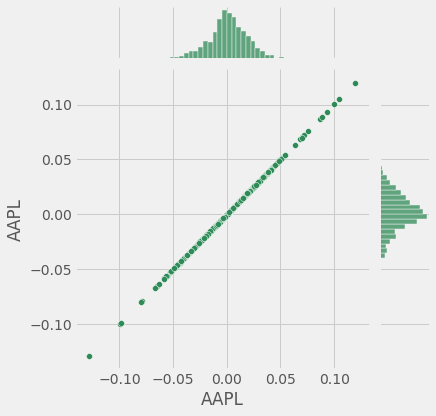

In [86]:
sns.jointplot(x='AAPL', y='AAPL', data=tickerReturns, kind='scatter', color='seagreen')

Khi chúng ta so sánh để chỉ ra độ tương quan giữa 2 mã chứng khoán, đầu tiên ta cần xem cách một mã tự đối chiếu với chính nó.

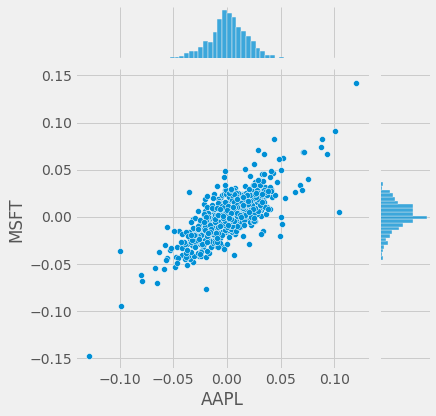

In [87]:
sns.jointplot(x='AAPL', y='MSFT', data=tickerReturns, kind='scatter')

Chúng ta có thế thấy nếu 2 mã chứng khoán nếu có tương quan với nhau thì chúng sẽ hình thành nên một linear relationship giữa giá trị của chúng.

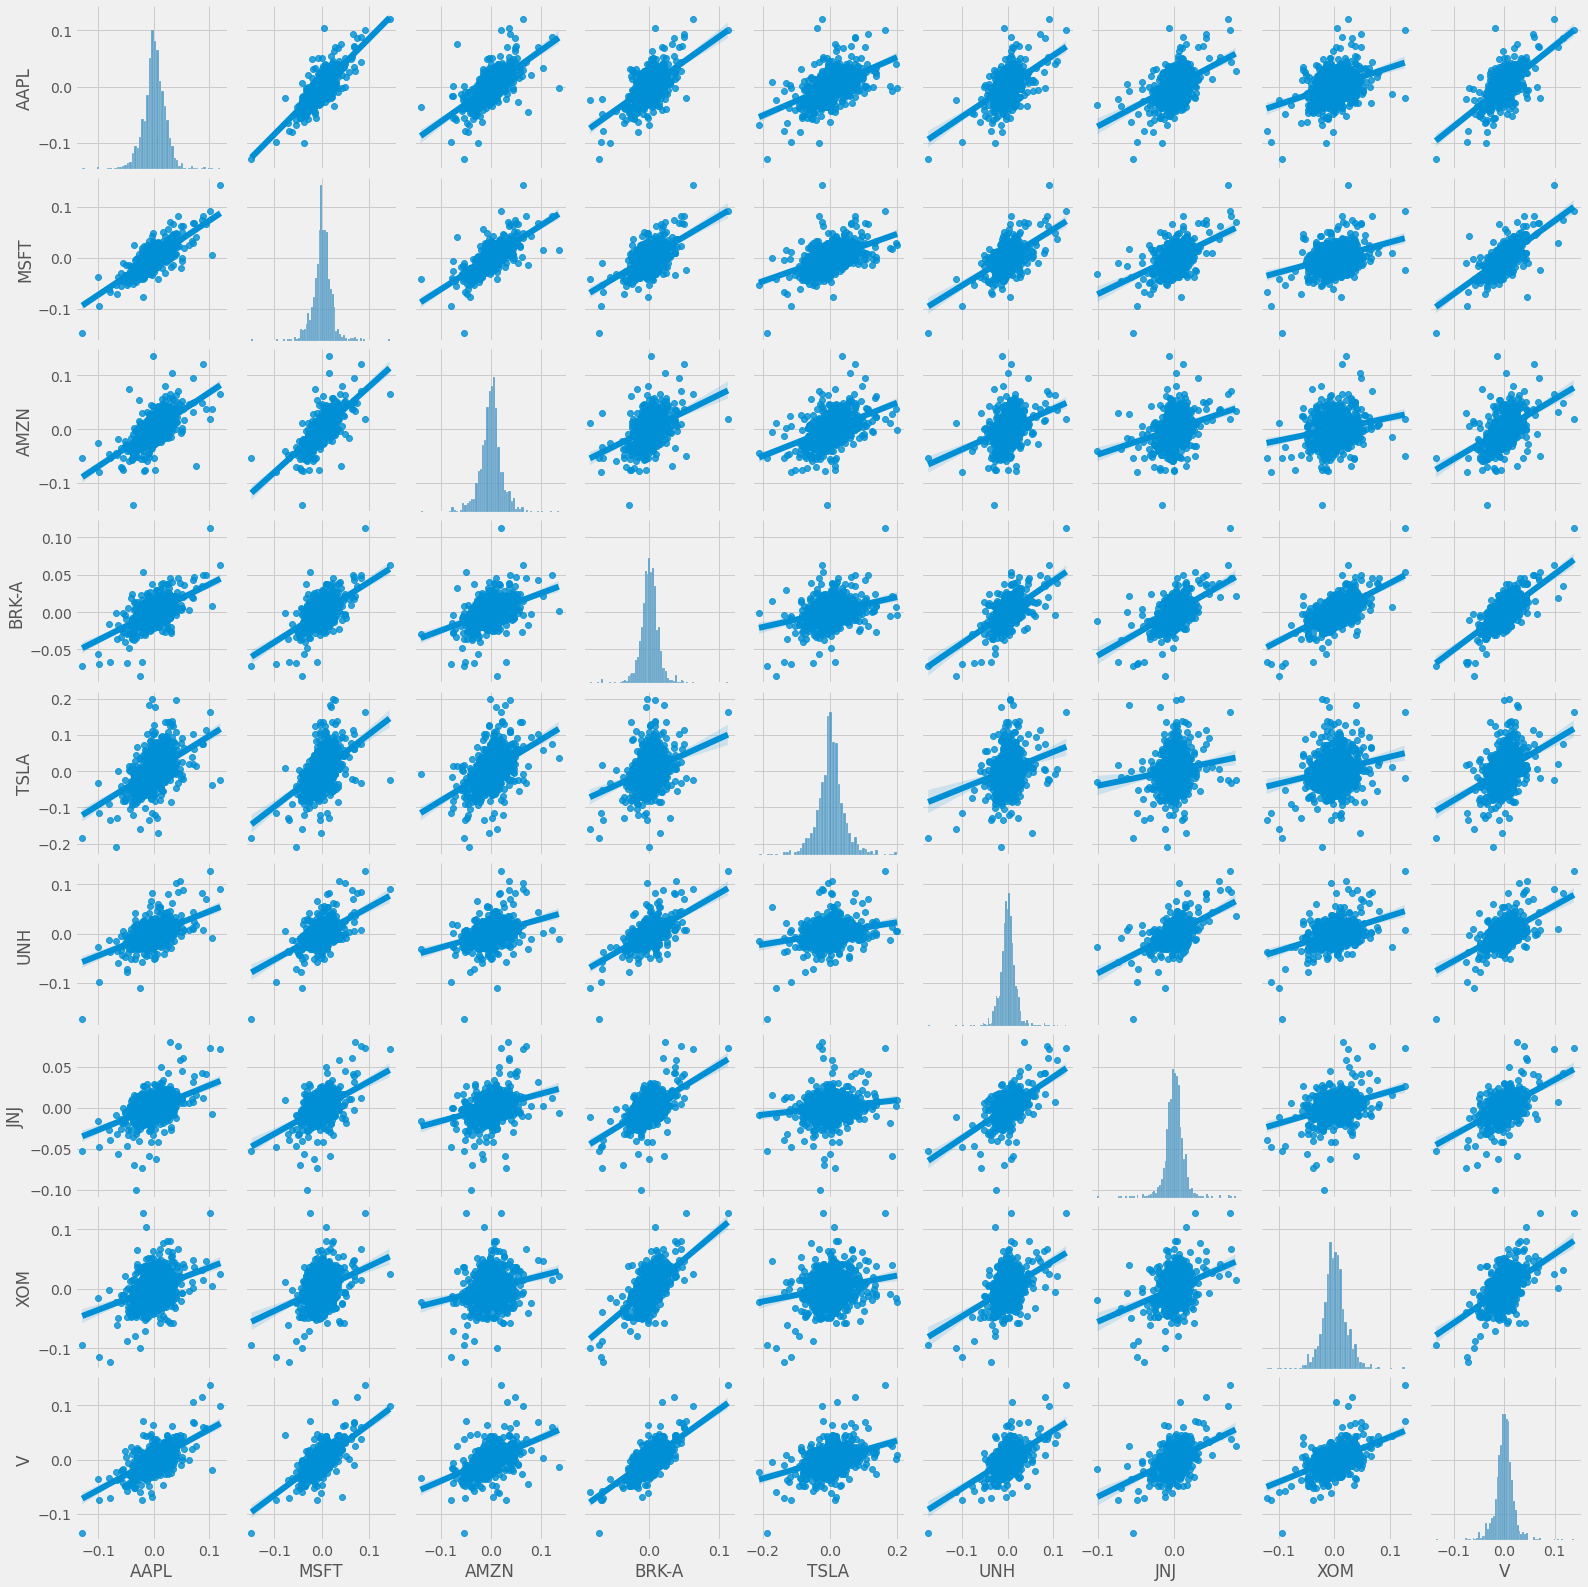

In [88]:
sns.pairplot(tickerReturns, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

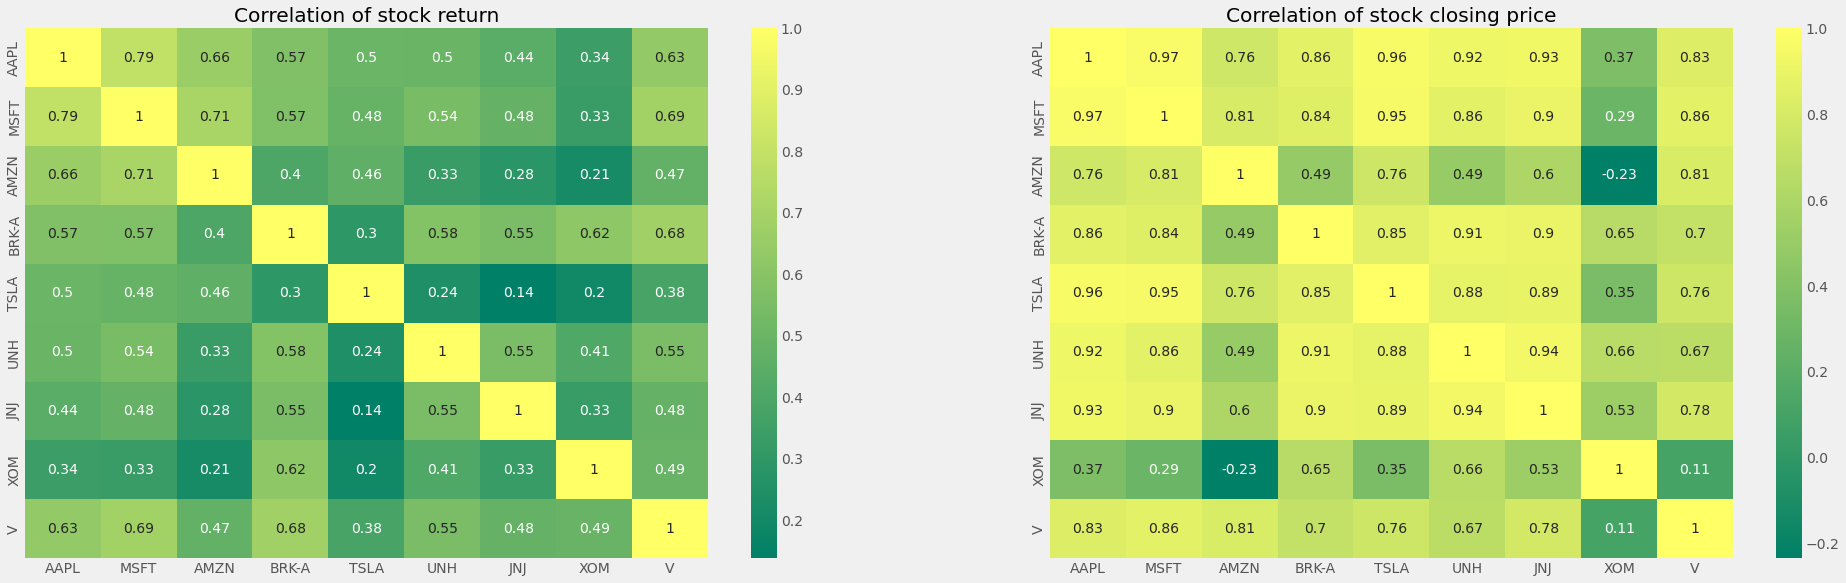

In [89]:
plt.figure(figsize=(30, 20))

plt.subplot(2, 2, 1)
sns.heatmap(tickerReturns.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closingDf.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')